In [1]:
%%time
import zipfile
zip_ref = zipfile.ZipFile("archive1.zip", 'r')
zip_ref.extractall("./scenery")
zip_ref.close()

CPU times: user 1.14 s, sys: 424 ms, total: 1.56 s
Wall time: 1.62 s


In [2]:
import matplotlib.pyplot as plt
def show_images(images, figsize=(20,10), columns = 5):
  plt.figure(figsize=figsize)
  for i, image in enumerate(images):
      plt.subplot(len(images) / columns + 1, columns, i + 1)
      plt.imshow(image)

In [3]:
import os
IMAGE_PATH="./scenery"
file_names=os.listdir(IMAGE_PATH)
print(f"number of images: {len(file_names)}")

number of images: 2599


500 333
(4096,)


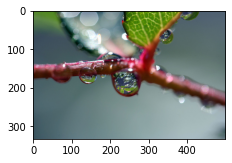

In [20]:
import numpy as np
import cv2
from PIL import Image
query_image_pillow=Image.open(f'{IMAGE_PATH}/00000000_(2).jpg')
width, height = query_image_pillow.size
print(width, height)
query_image=cv2.imread(f'{IMAGE_PATH}/00000000_(2).jpg')
query_hist_combined=cv2.calcHist([query_image],[0,1,2],None,[16,16,16],[0,256,0,256,0,256])
query_hist_combined = cv2.normalize(query_hist_combined, query_hist_combined).flatten()
print(query_hist_combined.shape)
show_images([np.array(query_image_pillow)])

In [21]:
file_names=os.listdir(IMAGE_PATH)
hists=[]
for file_name in file_names:
  img=cv2.imread(f'{IMAGE_PATH}/{file_name}')
  hist_combined=cv2.calcHist([img],[0,1,2],None,[16,16,16],[0,256,0,256,0,256])
  hist_combined = cv2.normalize(hist_combined, hist_combined).flatten()
  hists.append({"hist":hist_combined,"file_name":file_name})

In [22]:
%%time
found_images=[]
for hist in hists:
  similarity=cv2.compareHist(query_hist_combined,hist["hist"],cv2.HISTCMP_INTERSECT)
  found_images.append({"similarity":similarity,"file_name":hist["file_name"]})
found_images.sort(key=lambda item: item["similarity"],reverse=True)
found_images=found_images[:10]

CPU times: user 21 ms, sys: 800 µs, total: 21.8 ms
Wall time: 23.5 ms


In [23]:
print(found_images)
images_np=[]
found_images_filenames=list(map(lambda el: el["file_name"],found_images))
for image_filename in found_images_filenames:
  images_np.append(np.array(Image.open(f'{IMAGE_PATH}/{image_filename}')))

[{'similarity': 6.204618761104939, 'file_name': '475936554_a2b38aaa8e.jpg'}, {'similarity': 3.4006237642825, 'file_name': '16155980245_6ab8d7b888.jpg'}, {'similarity': 2.789896593956655, 'file_name': '9262004825_710346cde9_n.jpg'}, {'similarity': 2.5983609438189887, 'file_name': '17821980772_35164ae1e8_n.jpg'}, {'similarity': 2.5273840471345466, 'file_name': '3465599902_14729e2b1b_n.jpg'}, {'similarity': 2.4709210331166105, 'file_name': '799952628_bf836677fa_n.jpg'}, {'similarity': 2.4584674300058396, 'file_name': '5863698305_04a4277401_n.jpg'}, {'similarity': 2.4199129195512796, 'file_name': '21413573151_e681c6a97a.jpg'}, {'similarity': 2.4098094377986854, 'file_name': '8687729737_a7fbeded2c_m.jpg'}, {'similarity': 2.406147714696999, 'file_name': '5905502226_bb23bd8fa0_n.jpg'}]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


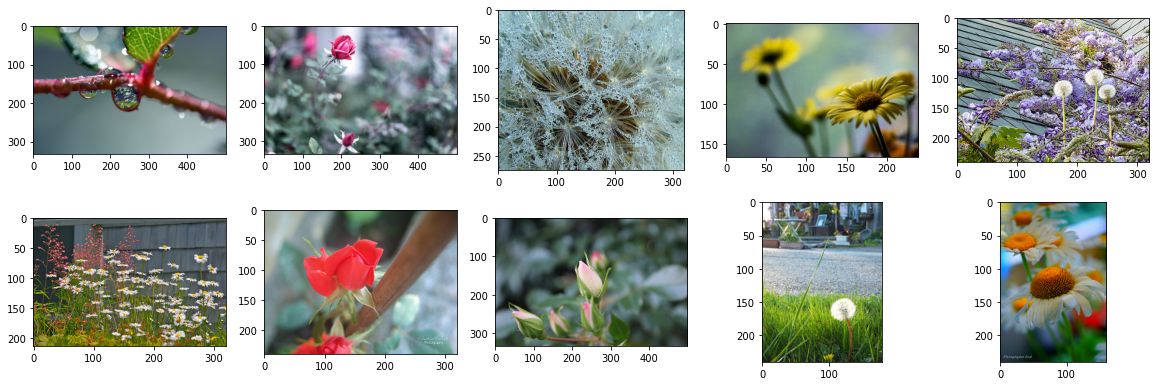

In [24]:
show_images(np.array(images_np))

In [25]:
from sklearn.neighbors import NearestNeighbors
hists_list=list(map(lambda el: el['hist'],hists))
knn = NearestNeighbors(n_neighbors=10,algorithm='brute',metric='euclidean')
knn.fit(hists_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=10)

In [26]:
%%time
distances,indices= knn.kneighbors([query_hist_combined], return_distance=True)

CPU times: user 55.5 ms, sys: 39 ms, total: 94.5 ms
Wall time: 59.2 ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


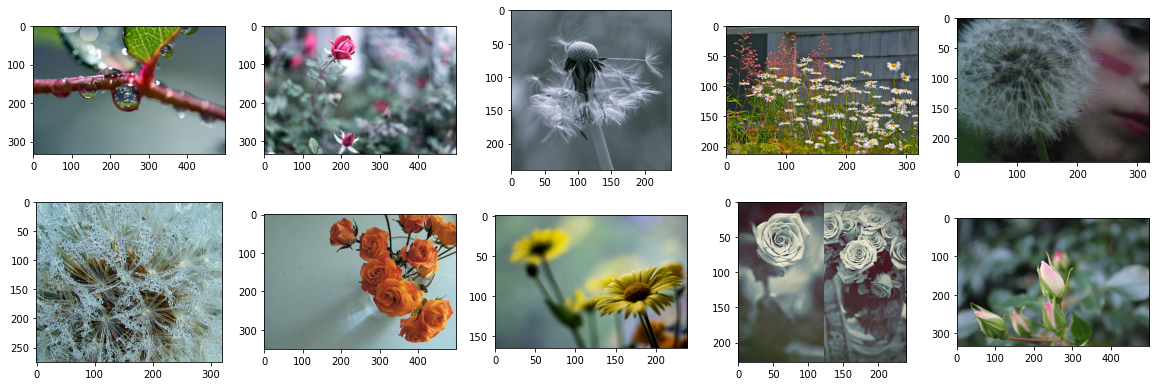

In [27]:
indices=indices[0]
images_np_knn=[]
for idx in indices:
  images_np_knn.append(np.array(Image.open(f'{IMAGE_PATH}/{file_names[idx]}')))
show_images(np.array(images_np_knn))